In [1]:
import pyfftw 
import matplotlib.pyplot as plt
import numpy
import scipy
import MapCollection
import glob
import MapData
import tqdm

In [2]:
surface_maps = MapCollection.TekCollection()
surface_maps.scans
data_dir = 'D:\\Waveforms\\'

In [3]:
dcs = []
rfs = []
for current_file in glob.glob(data_dir + '*.wfm'):
    if current_file.split('\\')[-1].startswith('RF'):
        rfs.append(current_file)
    else:
        dcs.append(current_file)

In [4]:
idx = 0
dc_sorted = []
rf_sorted = []
sorting = True
while sorting:
    temp_dc_list = []
    temp_rf_list = []
    for dc_file in dcs:
        if '{0:02d}'.format(idx) == dc_file.split('-')[1]:
            temp_dc_list.append(dc_file)
    if(len(temp_dc_list) == 0):
        pass
    else:
        dc_sorted.append(temp_dc_list)
    for rf_file in rfs:
        if '{0:02d}'.format(idx) == rf_file.split('-')[1]:
            temp_rf_list.append(rf_file)
    if(len(temp_rf_list) == 0):
        sorting = False
    else:
        rf_sorted.append(temp_rf_list)
        idx = idx + 1

In [5]:
for x in range(0, idx):
    surface_maps.scans.append(MapData.TekMap(data_dir))
    surface_maps.scans[-1].dc_filelist = dc_sorted[x]
    surface_maps.scans[-1].rf_filelist = rf_sorted[x]

In [6]:
for cmap in tqdm.tqdm(surface_maps.scans):
    
    cmap.mp_assemble_dcmap(16)
    cmap.compute_dcmask()
    cmap.mp_assemble_fftmap(16)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [10:28<00:00, 69.82s/it]


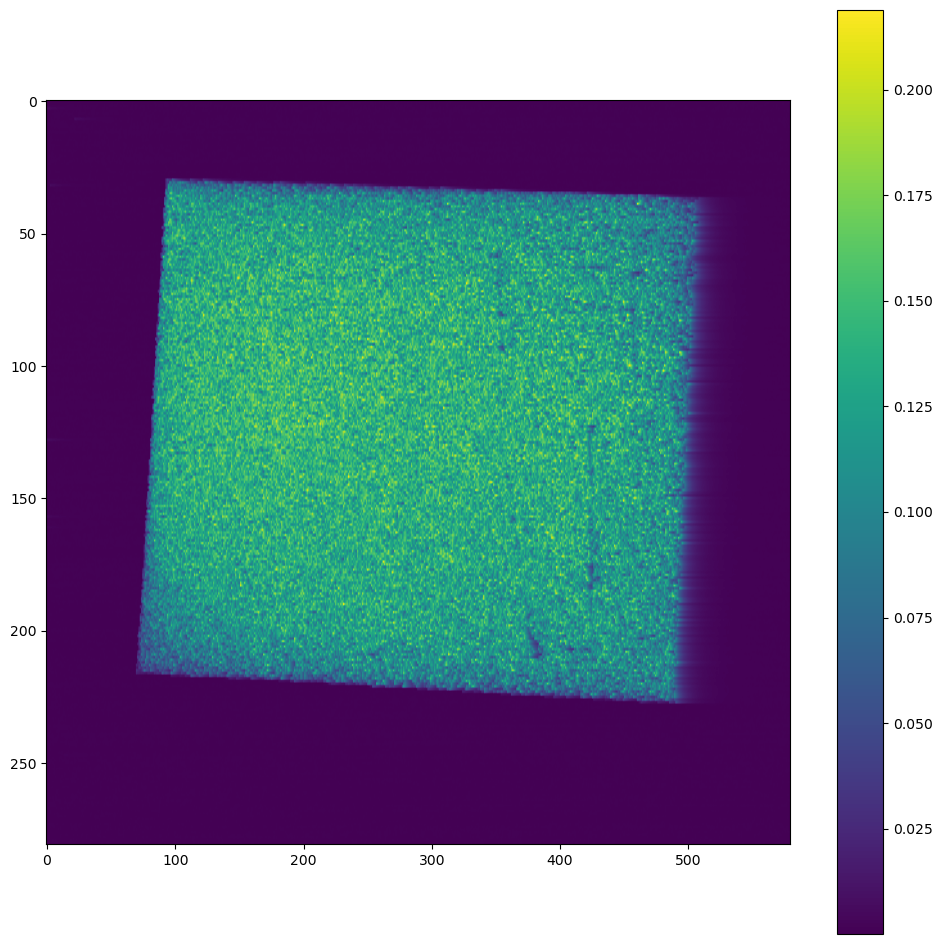

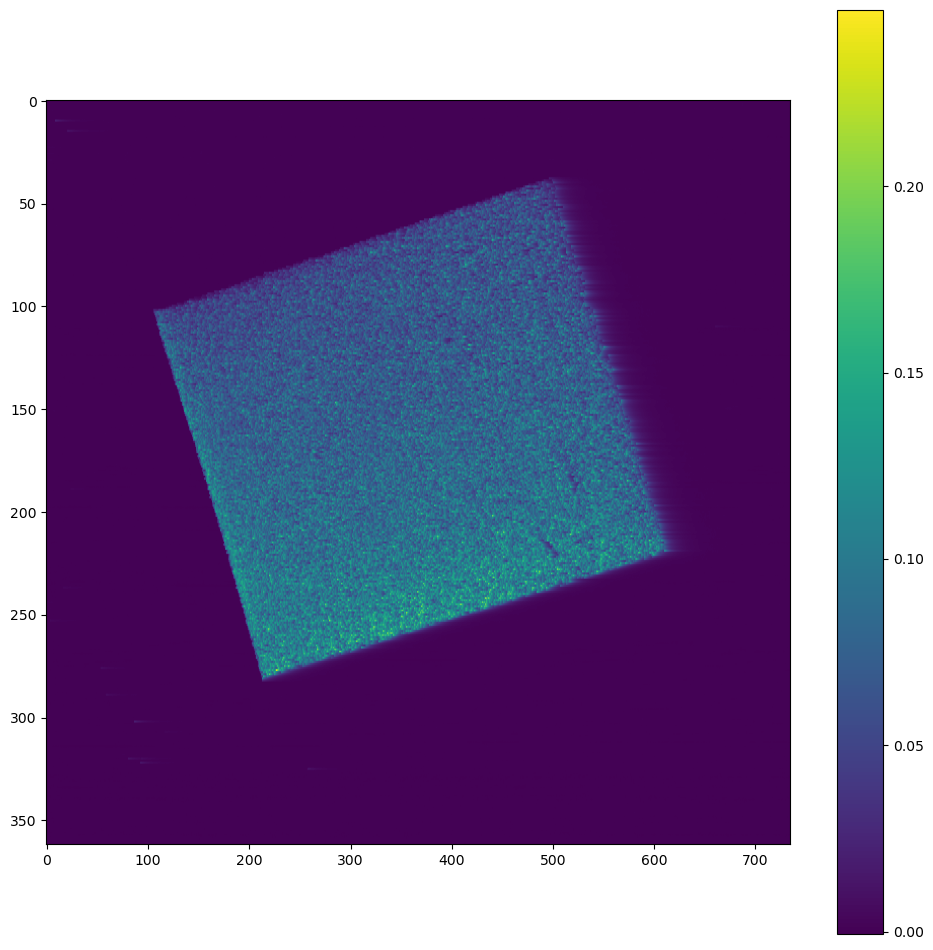

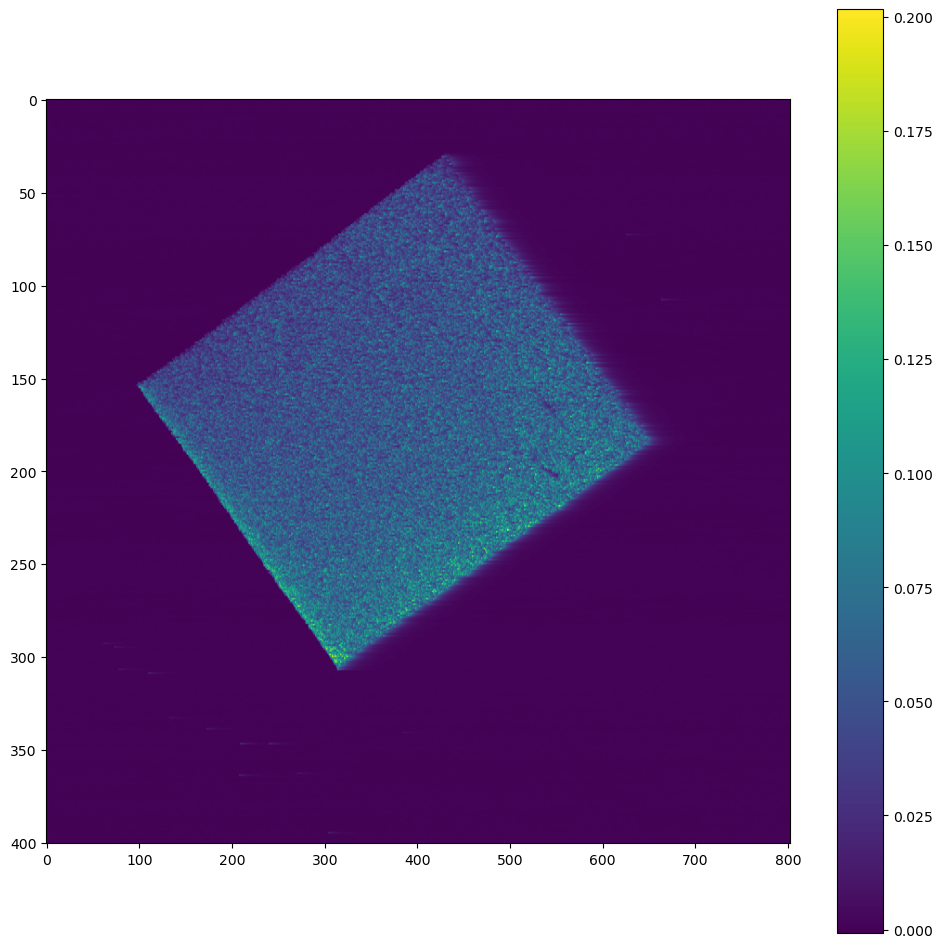

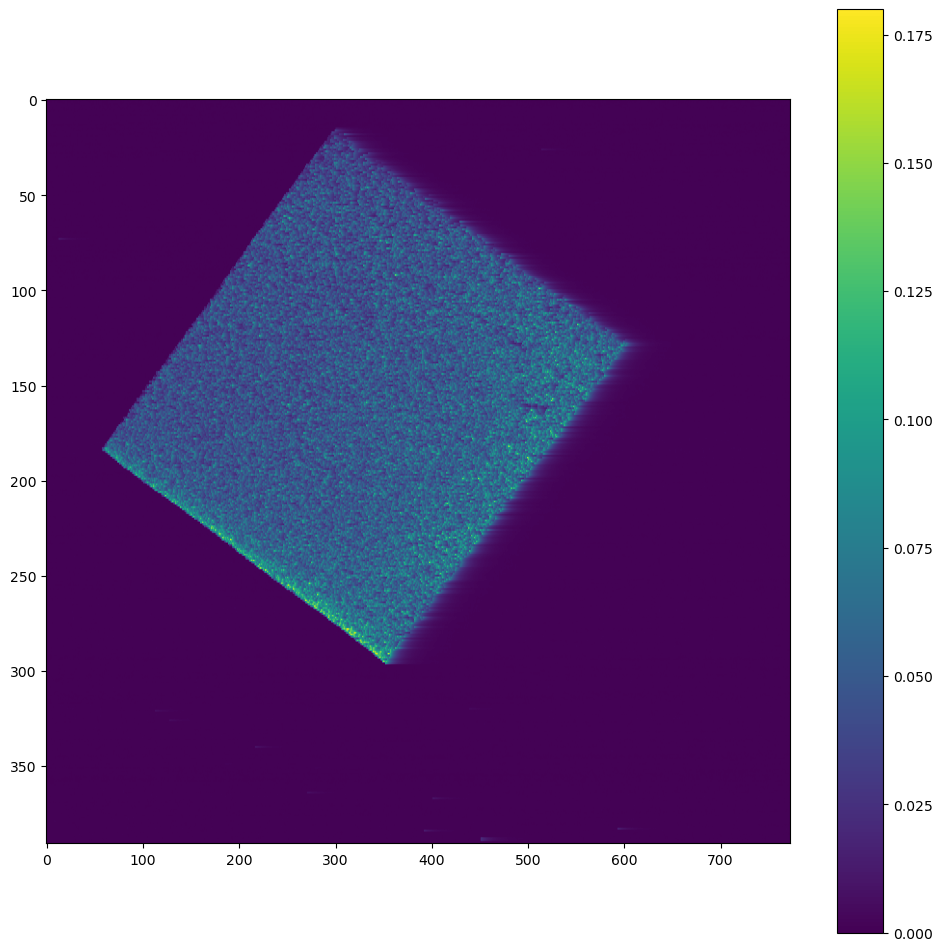

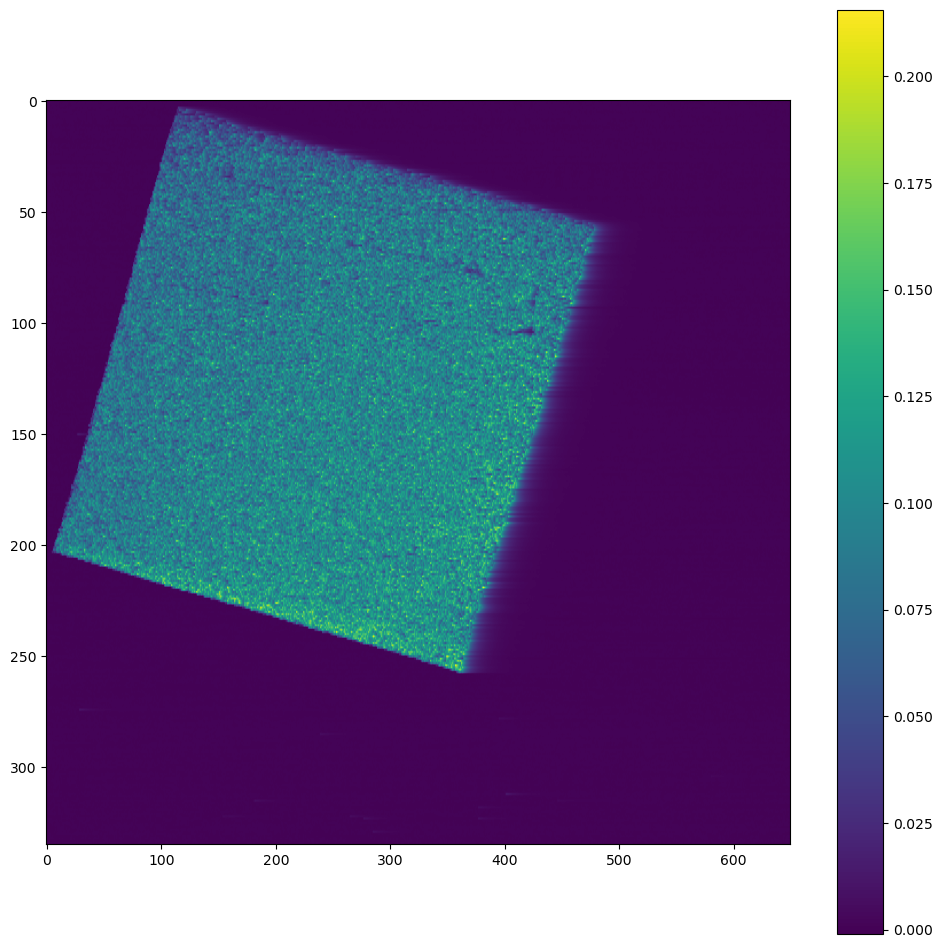

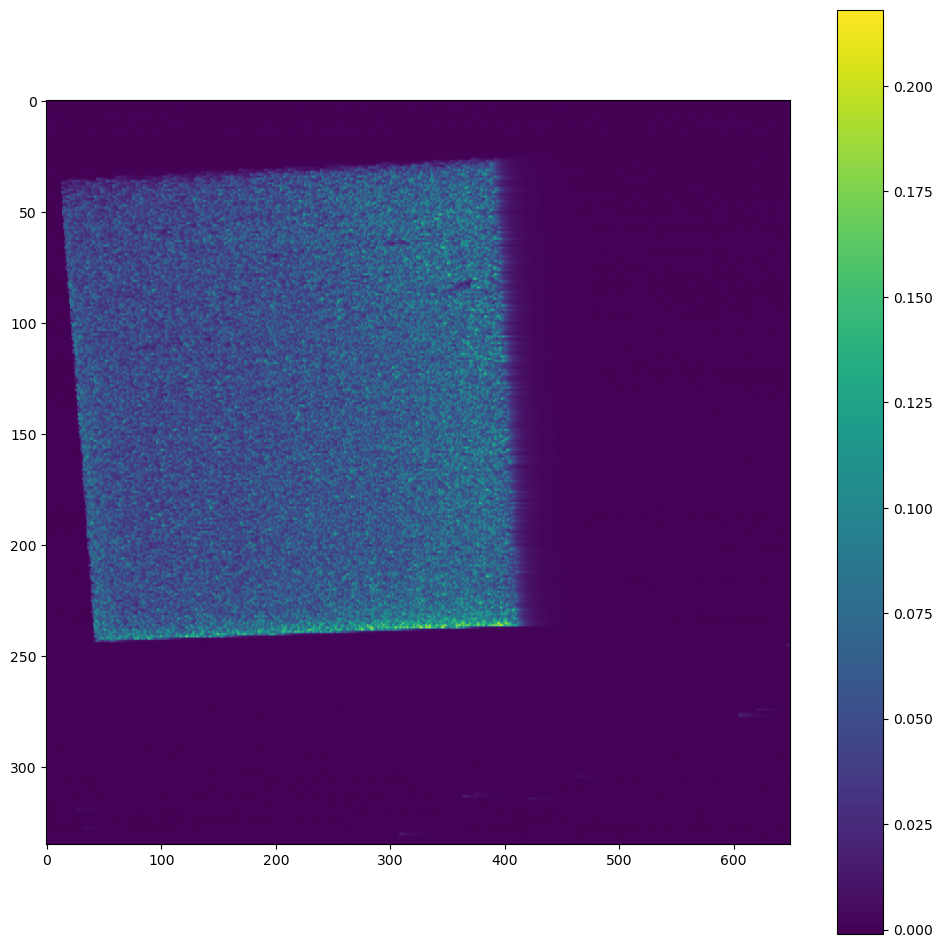

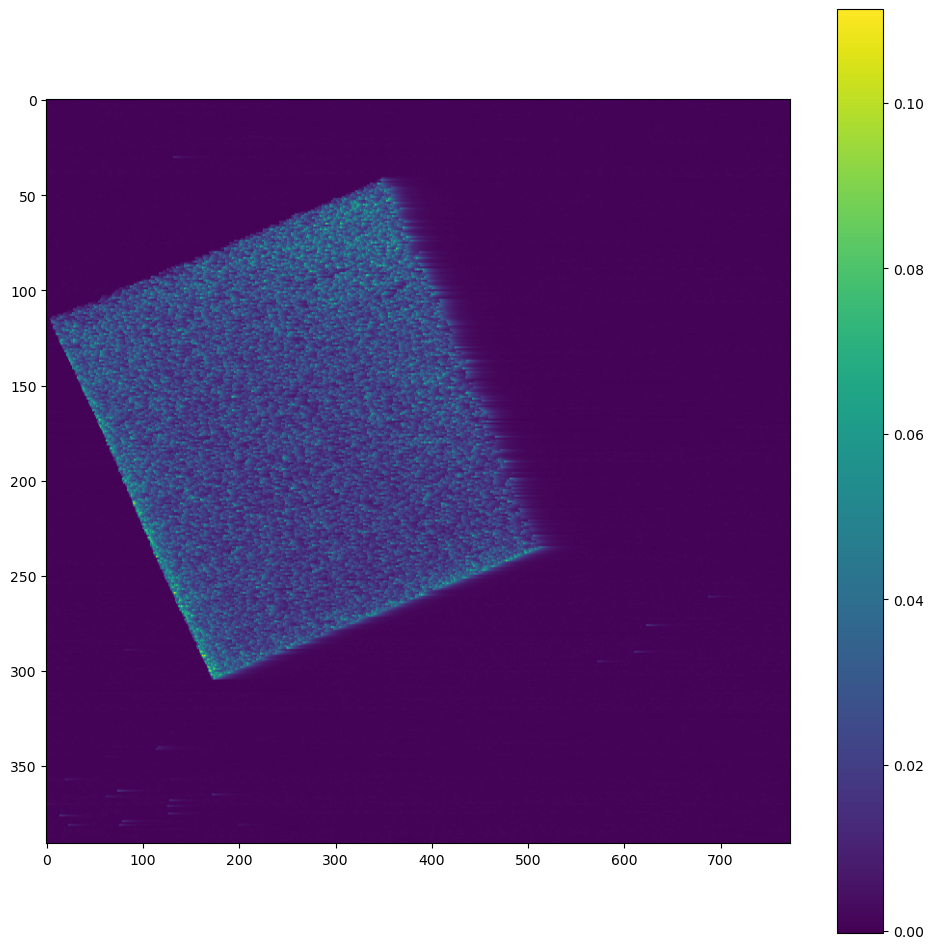

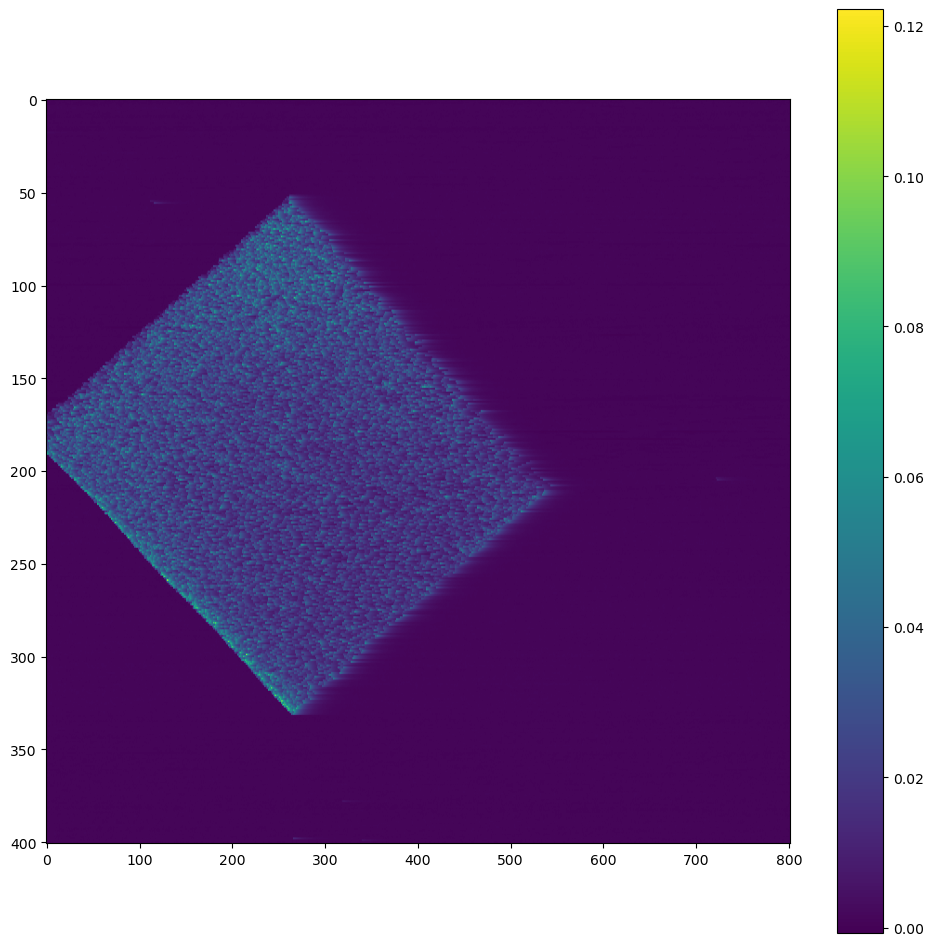

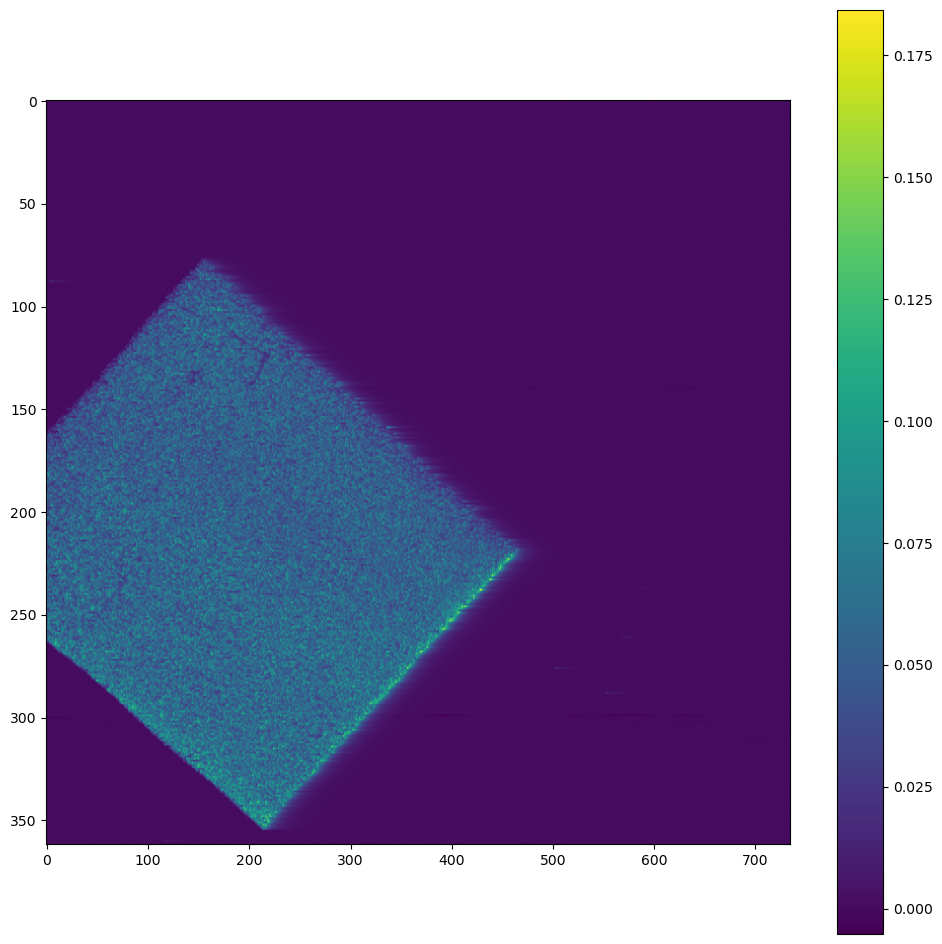

In [10]:
scan_idx = 0 
for cscan in surface_maps.scans:
    plt.figure(figsize=[12, 12])
    plt.imshow(cscan.dc_map, aspect=cscan.rf_map.shape[1] / cscan.rf_map.shape[0])
    #plt.clim([80E6, 280E6])
    plt.colorbar()
    #plt.savefig('DC-{0}.png'.format(scan_idx))
    scan_idx += 1
    

In [ ]:
for cscan in surface_maps.scans:
    plt.figure(figsize=[12, 12])
    plt.imshow(cscan.rf_map, aspect=cscan.rf_map.shape[1] / cscan.rf_map.shape[0])
    plt.clim([80E6, 300E6])
    plt.colorbar()

# import tekwfm
test_batch, _, _, _, _, _= tekwfm.read_wfm(rfs[100])

In [ ]:
plt.plot(cscan.rf_map.iloc[200,:])
plt.plot(cscan.rf_map.iloc[150,:])
plt.plot(cscan.rf_map.iloc[100,:])

In [ ]:
background_wfm, _, bg_sampleinterval, _, _, _ = tekwfm.read_wfm("C:\\Temp\\Background-5-17-2023-1445.wfm")
test_results = [mp_compute_fft(background_wfm, x) for x in rf_sorted[0]]

In [ ]:
plt.figure(figsize=[12,12])
plt.imshow(testdf*surface_maps.scans[0].dc_mask)
plt.colorbar()

In [ ]:
testdf = pd.DataFrame(test_results)

In [ ]:
import tekwfm
test_row, _, _, _, _, _ = tekwfm.read_wfm(rfs[100])
plt.figure(figsize=[12, 12])
plt.plot(test_row)

In [ ]:
background_wfm

In [ ]:
_fftpower = np.array(sp.fft.rfft(background_wfm[:,0], n=8192*6))
_fftfreq = sp.fft.fftfreq(_fftpower.__len__())  * 6250000000
_fftmax = _fftpower.argmax()
_fftmaxval = _fftfreq[_fftmax]
print(_fftmaxval)

In [ ]:
print(_fftmaxval/(1E6))

In [ ]:
154.87E6 * 25E-6